# Simple Notebook

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import os
import fnmatch
import glob
import re

from scipy.interpolate import interp1d
from scipy.interpolate import spline

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (9, 4)  # that's default image size

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

pd5='/research/ljindal/alian/gem5'
directory='/research/ljindal/pd-gem5_latest/rundir/NPB_MPI/PARSE_BASELINE'
colors = ['#0000ff', '#ff00ff', '#00ffff', '#00FF00', '#FF0000', '#ffa412']
#        [blue,     magenta,     sea blue,  green,     red,       orange] 

/research/ljindal/alian/gem5
/research/ljindal/pd-gem5_latest/rundir/NPB_MPI/PARSE_BASELINE
18
/research/ljindal/pd-gem5_latest/rundir/NPB_MPI/PARSE_BASELINE
./npb_ep_4/switch/m5out
npb_ep_4/switch/m5out
npb_ep_4/switch
switch
('ERROR! coud not find tux_num in', './npb_ep_4/switch/m5out')
/research/ljindal/pd-gem5_latest/rundir/NPB_MPI/PARSE_BASELINE/npb_ep_4/switch/m5out
[]
/research/ljindal/pd-gem5_latest/rundir/NPB_MPI/PARSE_BASELINE
./npb_ep_4/tux1/m5out
npb_ep_4/tux1/m5out
npb_ep_4/tux1
tux1
('tux_num is ', '1')
/research/ljindal/pd-gem5_latest/rundir/NPB_MPI/PARSE_BASELINE/npb_ep_4/tux1/m5out
['cum.core1.csv', 'cum.core0.csv', 'cum.core3.csv', 'cum.core2.csv', 'cum.allcores.csv']
('core_num is ', '1')


/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1218: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1228: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=bold:stretch=normal:size=medium. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1228: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=bold:stretch=normal:size=20.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1228: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=bold:stretch=normal:size=large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cm

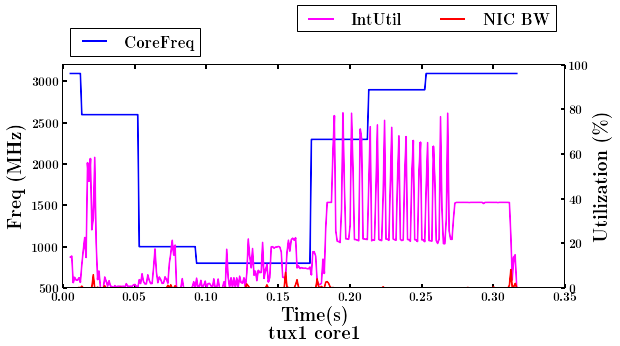

('core_num is ', '0')


/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1228: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=bold:stretch=normal:size=18.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


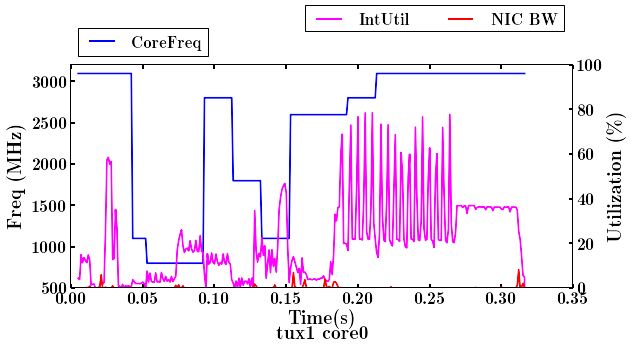

('core_num is ', '3')


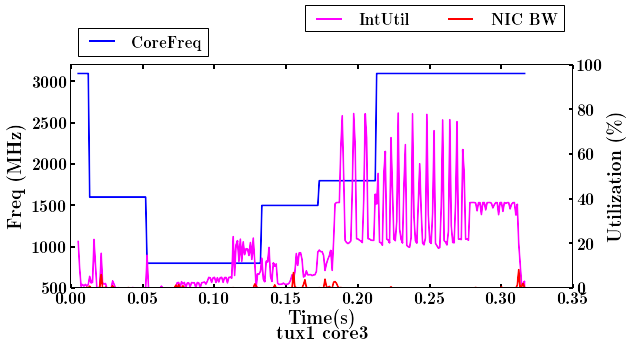

('core_num is ', '2')


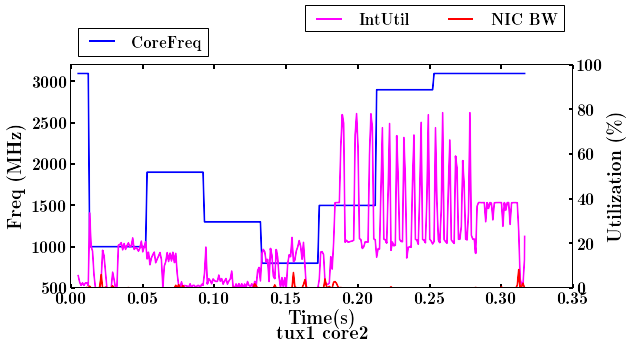

('*****DANGER***** coud not find core_num in', 'cum.allcores.csv')


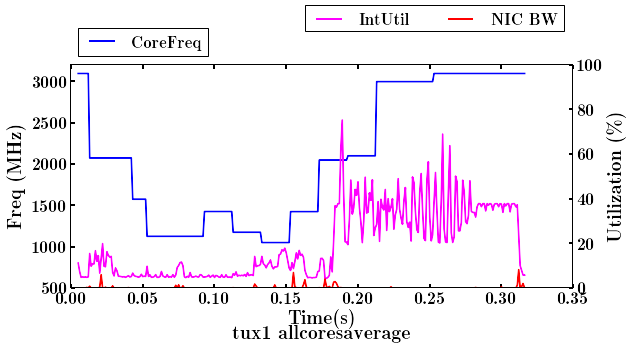

/research/ljindal/pd-gem5_latest/rundir/NPB_MPI/PARSE_BASELINE
./npb_ep_4/tux2/m5out
npb_ep_4/tux2/m5out
npb_ep_4/tux2
tux2
('tux_num is ', '2')
/research/ljindal/pd-gem5_latest/rundir/NPB_MPI/PARSE_BASELINE/npb_ep_4/tux2/m5out
['cum.core0.csv', 'cum.allcores.csv', 'cum.core1.csv', 'cum.core2.csv', 'cum.core3.csv']
('core_num is ', '0')


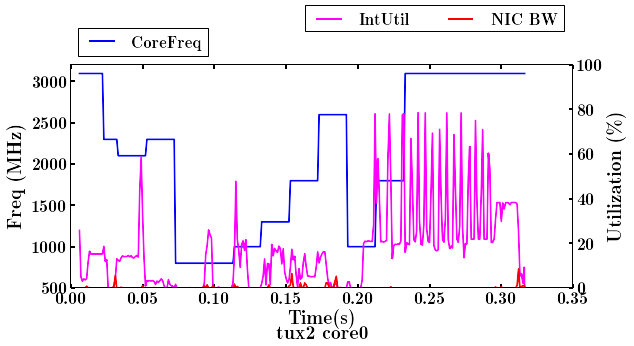

('*****DANGER***** coud not find core_num in', 'cum.allcores.csv')


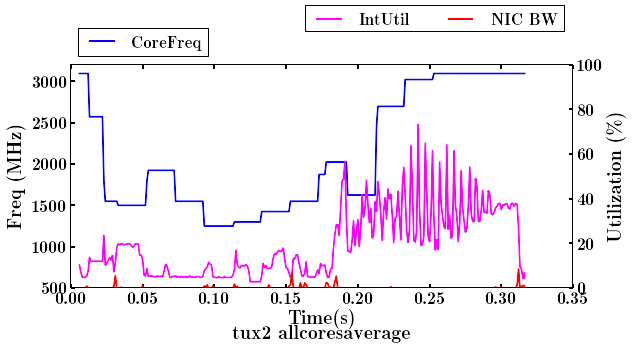

('core_num is ', '1')


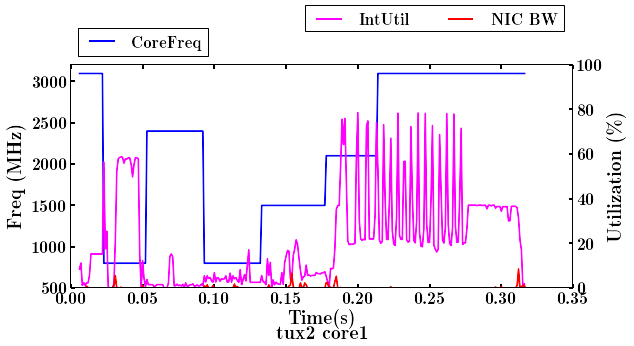

('core_num is ', '2')


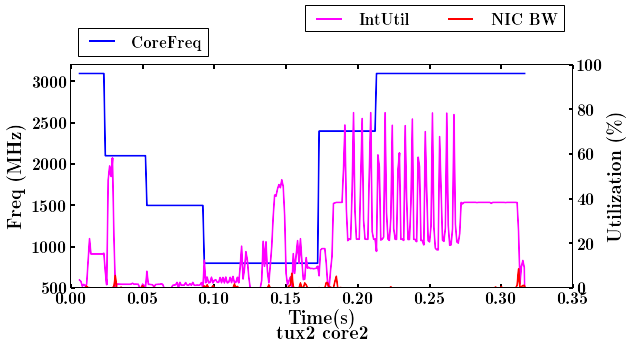

In [ ]:
%cd $pd5
%cd $directory
matches = []
total_graphs = 0
for root, dirnames, filenames in os.walk('.'):
  for filename in fnmatch.filter(filenames, 'stats.txt'):
    matches.append(os.path.join(root, filename))
    
print len(matches)

for statsfile in matches:
    statsdir = os.path.dirname(statsfile)
    %cd $directory
    print statsdir
    tuxname = os.path.normpath(statsdir)
    print tuxname
    tuxname = tuxname[:-6] # remove '/m5out' from the path
    print tuxname
    tuxname = os.path.basename(tuxname)
    print tuxname
    try:
        m = re.match('tux([0-9])', tuxname)
        tux_num = m.group(1)
        print ('tux_num is ', tux_num)
    except AttributeError:
        print ('ERROR! coud not find tux_num in', statsdir)
        exit(0)
    
    %cd $statsdir
    csvfiles = []
    for myfile in os.listdir('.'):
        if fnmatch.fnmatch(myfile,'*core*.csv'):
            csvfiles.append(myfile)
    print csvfiles
    
    for csv in csvfiles:
        core_num = '-1'
        try:
            m = re.match('cum.core([0-9]).csv', csv)
            core_num = m.group(1)
            print ('core_num is ', core_num)
        except AttributeError:
            print ('*****DANGER***** coud not find core_num in', csv)
            
        # now let's plot some graph for the csv
        fig, ax1 = plt.subplots()
        
        # plot pd-gem5 interrupts
        if os.path.isfile("pdgem5int.csv"):
            intdata = np.genfromtxt("pdgem5int.csv", delimiter=',', skip_header=1,
                                names=['IntSimSec', 'IntTime'])
            ax3 = fig.add_axes(ax1.get_position(), frameon=False) # to plot pd-gem5 interrupt lines
            # ax3.plot([0.1,0.3,0.5,0.7,0.9], [0.5, 0.5, 0.5, 0.5, 0.5], 'b--') # 
            ax3.plot(intdata['IntSimSec'], intdata['IntTime'], 'g--')
            ax3.set_xticks([]) # turn off the ax3 ticks
            ax3.set_yticks([])
        
        data = np.genfromtxt(csv, delimiter=',', skip_header=1,
                             names=['CumSimSec', 'Freq', 
                                    'B1' , 'IntUtil','FloatUtil','MemUtil',
                                    'B2' , 'EthBytes','EthBW', 'EthTotBW','SimSec',
                                    'B3', 'RxBW','TxBW','RxBWPercent','TxBWPercent'])
        
        ax1.plot(data['CumSimSec'], data['Freq'],colors[0], linewidth = 2, label='CoreFreq')
        ax1.set_ylim(500,3200)
        ax1.set_xlabel('Time(s)', fontsize=20, fontweight='bold')
        ax1.set_ylabel('Freq (MHz)', fontsize=20, fontweight='bold')
        lgd1 = ax1.legend(loc='upper left', bbox_to_anchor=[0,1.20])
        
        ax2 = ax1.twinx()
        ax2.plot(data['CumSimSec'], data['IntUtil'],colors[1], linewidth = 2, label='IntUtil')

        ax2.set_ylabel('Utilization (%)', fontsize=20, fontweight='bold')
        ax2.set_ylim(0,100)

        # ax2.plot(data['CumSimSec'], data['FloatUtil'],colors[2], linewidth = 2, label='FloatUtil') # seablue
        # ax2.plot(data['CumSimSec'], data['MemUtil'],colors[3], linewidth = 2, label='MemUtil') # green
        ax2.plot(data['CumSimSec'], data['EthBW'],colors[4], linewidth = 2, label='NIC BW') # red
        # ax2.plot(data['CumSimSec'], data['RxBWPercent'], colors[3], linewidth = 2, linestyle = '--', label='RX NICBW') # green dotted
        # ax2.plot(data['CumSimSec'], data['TxBWPercent'],colors[5], linewidth = 2, linestyle = '--', label='TX NICBW') # orange dotted
        
        # try spline here
        # x_sm = np.array(data['CumSimSec'])
        # y_sm = np.array(data['EthBW'])
        # x_smooth = np.linspace(x_sm.min(), x_sm.max(), 2000)
        # y_smooth = spline(data['CumSimSec'], data['EthBW'], x_smooth)
        # ax2.plot(x_smooth, y_smooth,colors[3], label='NICBW smooth')
        
        # lgd2 = ax2.legend(loc='upper right', bbox_to_anchor=[1,1.30], ncol=2)
        lgd2 = ax2.legend(loc='upper right', bbox_to_anchor=[1,1.30], ncol=2)

            
        matplotlib.rc('xtick', labelsize=18) 
        matplotlib.rc('ytick', labelsize=18)
        # making the tickmarks white, longer, and wider 
        ax1.tick_params(axis='both', length=4, width=2)
        ax2.tick_params(axis='both', length=4, width=2)

        
        if (core_num == '-1'):
            ax1.set_title('tux' + tux_num + ' allcoresaverage', y=-0.25, fontsize=20)
            fig.savefig('tux'+tux_num+'allcoresaverage.png', dpi=200, bbox_extra_artists=(lgd1,lgd2), bbox_inches='tight')
        else:
            ax1.set_title('tux' + tux_num + ' core' + core_num, y=-0.25, fontsize=20)
            fig.savefig('tux'+tux_num+'core'+core_num+'.png', dpi=200, bbox_extra_artists=(lgd1,lgd2), bbox_inches='tight')
        
        total_graphs = total_graphs + 1
        plt.show()
        
print ('total graphs plotted = ' , total_graphs)
        